In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['font.size'] = 20
warnings.filterwarnings('ignore')

In [2]:
binary_data = pd.read_csv('detect_dataset.csv')
multi_data = pd.read_csv('classData.csv')

In [3]:
binary_data.drop(binary_data.iloc[:,[7,8]], axis=1, inplace=True)

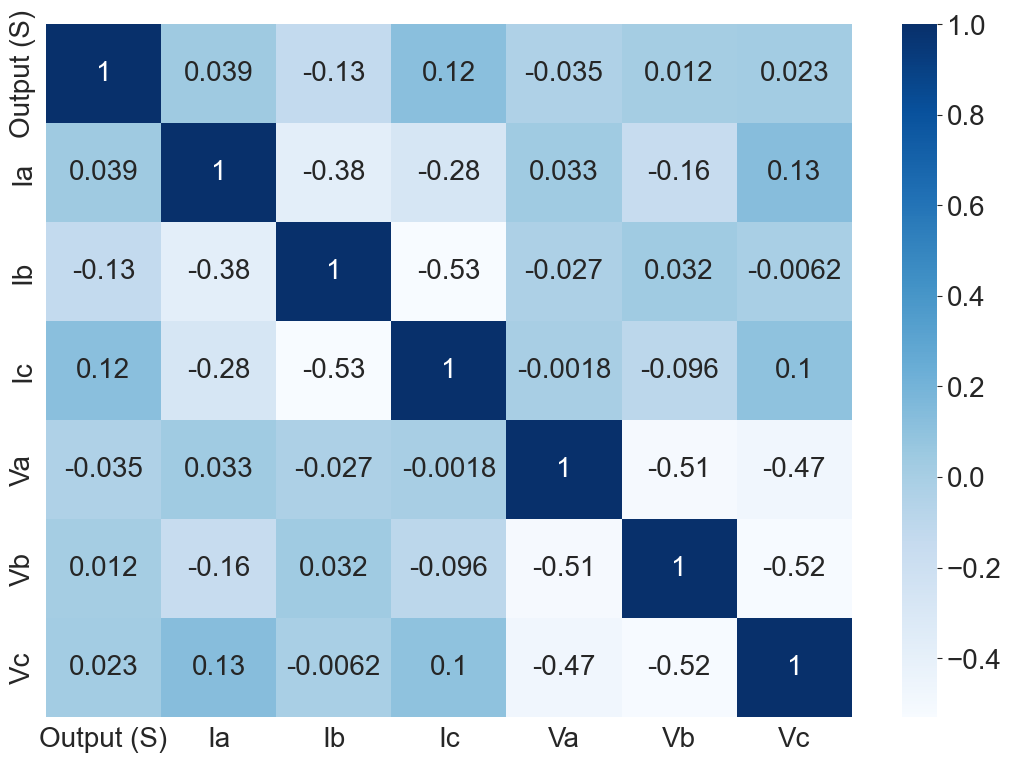

In [4]:
sns.heatmap(binary_data.corr(), annot=True, cmap='Blues')
plt.show()

In [5]:
y = binary_data.iloc[:,0]
X = binary_data.iloc[:,1:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9600, 6), (2401, 6), (9600,), (2401,))

In [6]:
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

In [7]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')
print(f'Precision Score: {precision_score(y_test, y_pred)*100:.03f}%')
print(f'Recall Score: {recall_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 99.625%
Precision Score: 99.728%
Recall Score: 99.457%


In [8]:
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


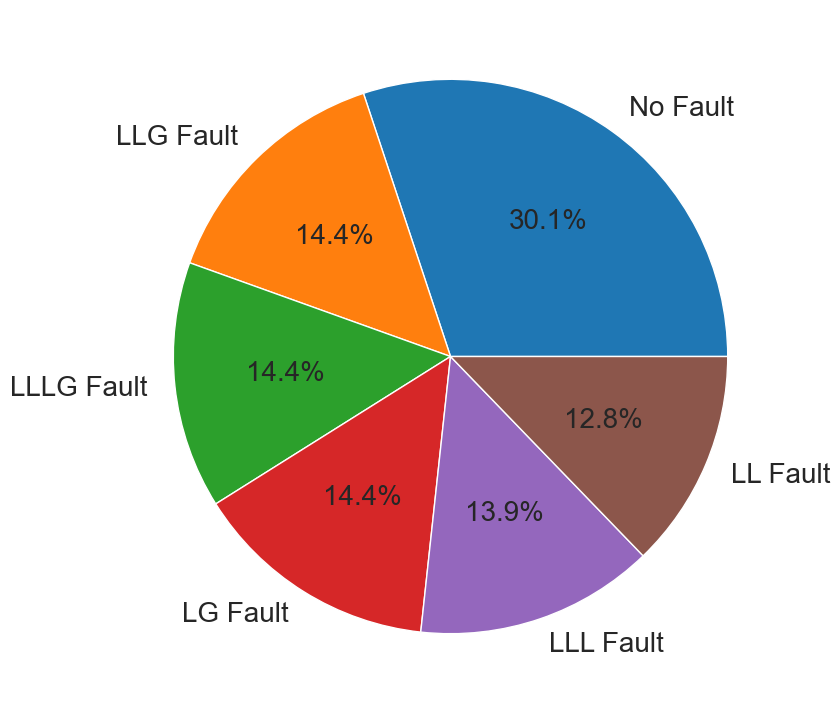

In [9]:
plt.pie(multi_data['faultType'].value_counts(), autopct='%1.1f%%',
       labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

In [10]:
X = multi_data.drop(['G','C','B','A','faultType'], axis=1)
y = multi_data['faultType']

In [11]:
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 6), (1573, 6), (6288,), (1573,))

In [16]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

In [17]:
y_pred

array([3, 1, 0, ..., 1, 0, 0])

In [22]:
set(y_pred)

{0, 1, 2, 3, 4, 5}

In [18]:
from joblib import dump


In [19]:
dump(model_2, 'model.joblib')

['model.joblib']